# Process the dataset

***NOTE***: SCRIVERE CODICE DICT

In [78]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms
import clip
import torch

import os
from pprint import pprint

wordnet_classes = {
    "n01498041": "stingray",
    "n01531178": "goldfinch",
    "n01534433": "junco",
    "n01558993": "American robin",
    "n01580077": "jay",
    "n01614925": "bald eagle",
    "n01616318": "vulture",
    "n01631663": "newt",
    "n01641577": "American bullfrog",
    "n01669191": "box turtle",
    "n01677366": "green iguana",
    "n01687978": "agama",
    "n01694178": "chameleon",
    "n01698640": "American alligator",
    "n01735189": "garter snake",
    "n01770081": "harvestman",
    "n01770393": "scorpion",
    "n01774750": "tarantula",
    "n01784675": "centipede",
    "n01819313": "sulphur-crested cockatoo",
    "n01820546": "lorikeet",
    "n01833805": "hummingbird",
    "n01843383": "toucan",
    "n01847000": "duck",
    "n01855672": "goose",
    "n01882714": "koala",
    "n01910747": "jellyfish",
    "n01914609": "sea anemone",
    "n01924916": "flatworm",
    "n01944390": "snail",
    "n01985128": "crayfish",
    "n01986214": "hermit crab",
    "n02007558": "flamingo",
    "n02009912": "great egret",
    "n02037110": "oystercatcher",
    "n02051845": "pelican",
    "n02077923": "sea lion",
    "n02085620": "Chihuahua",
    "n02099601": "Golden Retriever",
    "n02106550": "Rottweiler",
    "n02106662": "German Shepherd Dog",
    "n02110958": "pug",
    "n02119022": "red fox",
    "n02123394": "Persian cat",
    "n02127052": "lynx",
    "n02129165": "lion",
    "n02133161": "American black bear",
    "n02137549": "mongoose",
    "n02165456": "ladybug",
    "n02174001": "rhinoceros beetle",
    "n02177972": "weevil",
    "n02190166": "fly",
    "n02206856": "bee",
    "n02219486": "ant",
    "n02226429": "grasshopper",
    "n02231487": "stick insect",
    "n02233338": "cockroach",
    "n02236044": "mantis",
    "n02259212": "leafhopper",
    "n02268443": "dragonfly",
    "n02279972": "monarch butterfly",
    "n02280649": "small white",
    "n02281787": "gossamer-winged butterfly",
    "n02317335": "starfish",
    "n02325366": "cottontail rabbit",
    "n02346627": "porcupine",
    "n02356798": "fox squirrel",
    "n02361337": "marmot",
    "n02410509": "bison",
    "n02445715": "skunk",
    "n02454379": "armadillo",
    "n02486410": "baboon",
    "n02492035": "white-headed capuchin",
    "n02504458": "African bush elephant",
    "n02655020": "pufferfish",
    "n02669723": "academic gown",
    "n02672831": "accordion",
    "n02676566": "acoustic guitar",
    "n02690373": "airliner",
    "n02701002": "ambulance",
    "n02730930": "apron",
    "n02777292": "balance beam",
    "n02782093": "balloon",
    "n02787622": "banjo",
    "n02793495": "barn",
    "n02797295": "wheelbarrow",
    "n02802426": "basketball",
    "n02814860": "lighthouse",
    "n02815834": "beaker",
    "n02837789": "bikini",
    "n02879718": "bow",
    "n02883205": "bow tie",
    "n02895154": "breastplate",
    "n02906734": "broom",
    "n02948072": "candle",
    "n02951358": "canoe",
    "n02980441": "castle",
    "n02992211": "cello",
    "n02999410": "chain",
    "n03014705": "chest",
    "n03026506": "Christmas stocking",
    "n03124043": "cowboy boot",
    "n03125729": "cradle",
    "n03187595": "rotary dial telephone",
    "n03196217": "digital clock",
    "n03223299": "doormat",
    "n03250847": "drumstick",
    "n03255030": "dumbbell",
    "n03291819": "envelope",
    "n03325584": "feather boa",
    "n03355925": "flagpole",
    "n03384352": "forklift",
    "n03388043": "fountain",
    "n03417042": "garbage truck",
    "n03443371": "goblet",
    "n03444034": "go-kart",
    "n03445924": "golf cart",
    "n03452741": "grand piano",
    "n03483316": "hair dryer",
    "n03584829": "clothes iron",
    "n03590841": "jack-o'-lantern",
    "n03594945": "jeep",
    "n03617480": "kimono",
    "n03666591": "lighter",
    "n03670208": "limousine",
    "n03717622": "manhole cover",
    "n03720891": "maraca",
    "n03721384": "marimba",
    "n03724870": "mask",
    "n03775071": "mitten",
    "n03788195": "mosque",
    "n03804744": "nail",
    "n03837869": "obelisk",
    "n03840681": "ocarina",
    "n03854065": "organ",
    "n03888257": "parachute",
    "n03891332": "parking meter",
    "n03935335": "piggy bank",
    "n03982430": "billiard table",
    "n04019541": "hockey puck",
    "n04033901": "quill",
    "n04039381": "racket",
    "n04067472": "reel",
    "n04086273": "revolver",
    "n04099969": "rocking chair",
    "n04118538": "rugby ball",
    "n04131690": "salt shaker",
    "n04133789": "sandal",
    "n04141076": "saxophone",
    "n04146614": "school bus",
    "n04147183": "schooner",
    "n04179913": "sewing machine",
    "n04208210": "shovel",
    "n04235860": "sleeping bag",
    "n04252077": "snowmobile",
    "n04252225": "snowplow",
    "n04254120": "soap dispenser",
    "n04270147": "spatula",
    "n04275548": "spider web",
    "n04310018": "steam locomotive",
    "n04317175": "stethoscope",
    "n04344873": "couch",
    "n04347754": "submarine",
    "n04355338": "sundial",
    "n04366367": "suspension bridge",
    "n04376876": "syringe",
    "n04389033": "tank",
    "n04399382": "teddy bear",
    "n04442312": "toaster",
    "n04456115": "torch",
    "n04482393": "tricycle",
    "n04507155": "umbrella",
    "n04509417": "unicycle",
    "n04532670": "viaduct",
    "n04540053": "volleyball",
    "n04554684": "washing machine",
    "n04562935": "water tower",
    "n04591713": "wine bottle",
    "n04606251": "shipwreck",
    "n07583066": "guacamole",
    "n07695742": "pretzel",
    "n07697313": "cheeseburger",
    "n07697537": "hot dog",
    "n07714990": "broccoli",
    "n07718472": "cucumber",
    "n07720875": "bell pepper",
    "n07734744": "mushroom",
    "n07749582": "lemon",
    "n07753592": "banana",
    "n07760859": "custard apple",
    "n07768694": "pomegranate",
    "n07831146": "carbonara",
    "n09229709": "bubble",
    "n09246464": "cliff",
    "n09472597": "volcano",
    "n09835506": "baseball player",
    "n11879895": "rapeseed",
    "n12057211": "yellow lady's slipper",
    "n12144580": "corn",
    "n12267677": "acorn"
}

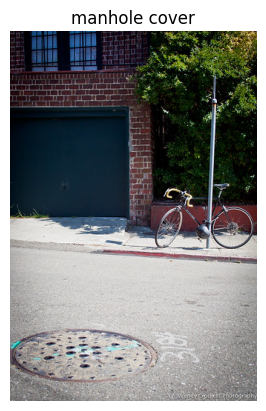

In [79]:

# def read_data(classnames, image_dir):
#     for folder in os.listdir(image_dir):
#         for filename in os.listdir(os.path.join(image_dir, folder)):
#             if filename.endswith(".png") or filename.endswith(".jpg"):
#                 classname = classnames[filename.split("_")[0]]
#                 impath = os.path.join(image_dir, filename)
#                 item = Datum(impath=impath, label=0, classname=classname)
#                 yield item

def pick_random_image(image_dir):
    folder = np.random.choice(os.listdir(image_dir))
    filename = np.random.choice(os.listdir(os.path.join(image_dir, folder)))
    impath = os.path.join(image_dir, folder, filename)
    return impath, folder

ROOT = "./imagenet-a"

image, key_label = pick_random_image(ROOT)

label = wordnet_classes[key_label]

# show image

image = Image.open(image)
plt.imshow(image)
plt.title(f"{label}")
plt.axis("off")
plt.show()

## Utils


In [80]:
def complex_random_augmentation(image):
    # Lista di trasformazioni potenzialmente applicabili
    transform_list = [
        transforms.RandomHorizontalFlip(p=0.5),  # Flip orizzontale con 50% di probabilità
        transforms.RandomVerticalFlip(p=0.2),    # Flip verticale con 20% di probabilità
        transforms.RandomRotation(45),           # Rotazione casuale di ±45 gradi
        transforms.RandomApply([                 # Applica con probabilità del 30% la seguente trasformazione
            transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1)
        ], p=0.3),
        transforms.RandomResizedCrop(size=(256, 256), scale=(0.5, 1.0), ratio=(0.75, 1.33)),  # Crop ridimensionato casuale
        transforms.RandomGrayscale(p=0.1),       # Conversione in scala di grigi con 10% di probabilità
        transforms.RandomApply([                 # Applica con probabilità del 40% la seguente trasformazione
            transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
        ], p=0.4)
    ]

    # Componi tutte le trasformazioni
    augmentation = transforms.Compose(transform_list)

    # Applica le trasformazioni all'immagine
    augmented_image = augmentation(image)
    return augmented_image

def visualize_images(images):
    num_images = len(images)
    cols = 4  # Definisci il numero di colonne per la griglia di subplot
    rows = (num_images + cols - 1) // cols  # Calcola il numero di righe necessarie

    plt.figure(figsize=(32, rows * 4))  # Modifica l'altezza in base al numero di righe

    for i, image in enumerate(images):
        # Subplot per l'immagine
        plt.subplot(rows, cols * 2, 2 * i + 1)
        plt.imshow(image)
        plt.axis("off")

    # plt.subplots_adjust(wspace=0.1, hspace=0.5)  # Adjust lo spazio tra i subplot
    plt.show()

def visualize_results(image, top_probs, top_labels):
    num_images = len(image)
    cols = 4  # Definisci il numero di colonne per la griglia di subplot
    rows = (num_images + cols - 1) // cols  # Calcola il numero di righe necessarie

    plt.figure(figsize=(16, rows * 4))  # Modifica l'altezza in base al numero di righe

    for i, image in enumerate(image):
        # Subplot per l'immagine
        plt.subplot(rows, cols * 2, 2 * i + 1)
        plt.imshow(image)
        plt.axis("off")

        # Subplot per il grafico a barre delle probabilità
        plt.subplot(rows, cols * 2, 2 * i + 2)
        y = np.arange(top_probs.shape[-1])
        plt.grid()
        plt.barh(y, top_probs[i])
        plt.gca().invert_yaxis()
        plt.gca().set_axisbelow(True)
        plt.yticks(y, [list(wordnet_classes.values())[index] for index in top_labels[i].numpy()])
        plt.xlabel("probability")

    plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust lo spazio tra i subplot
    plt.show()

def bar_graph(top_labels, top_probs):
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs)
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [list(wordnet_classes.values())[index] for index in top_labels.numpy()])
    plt.xlabel("probability")
    plt.show()

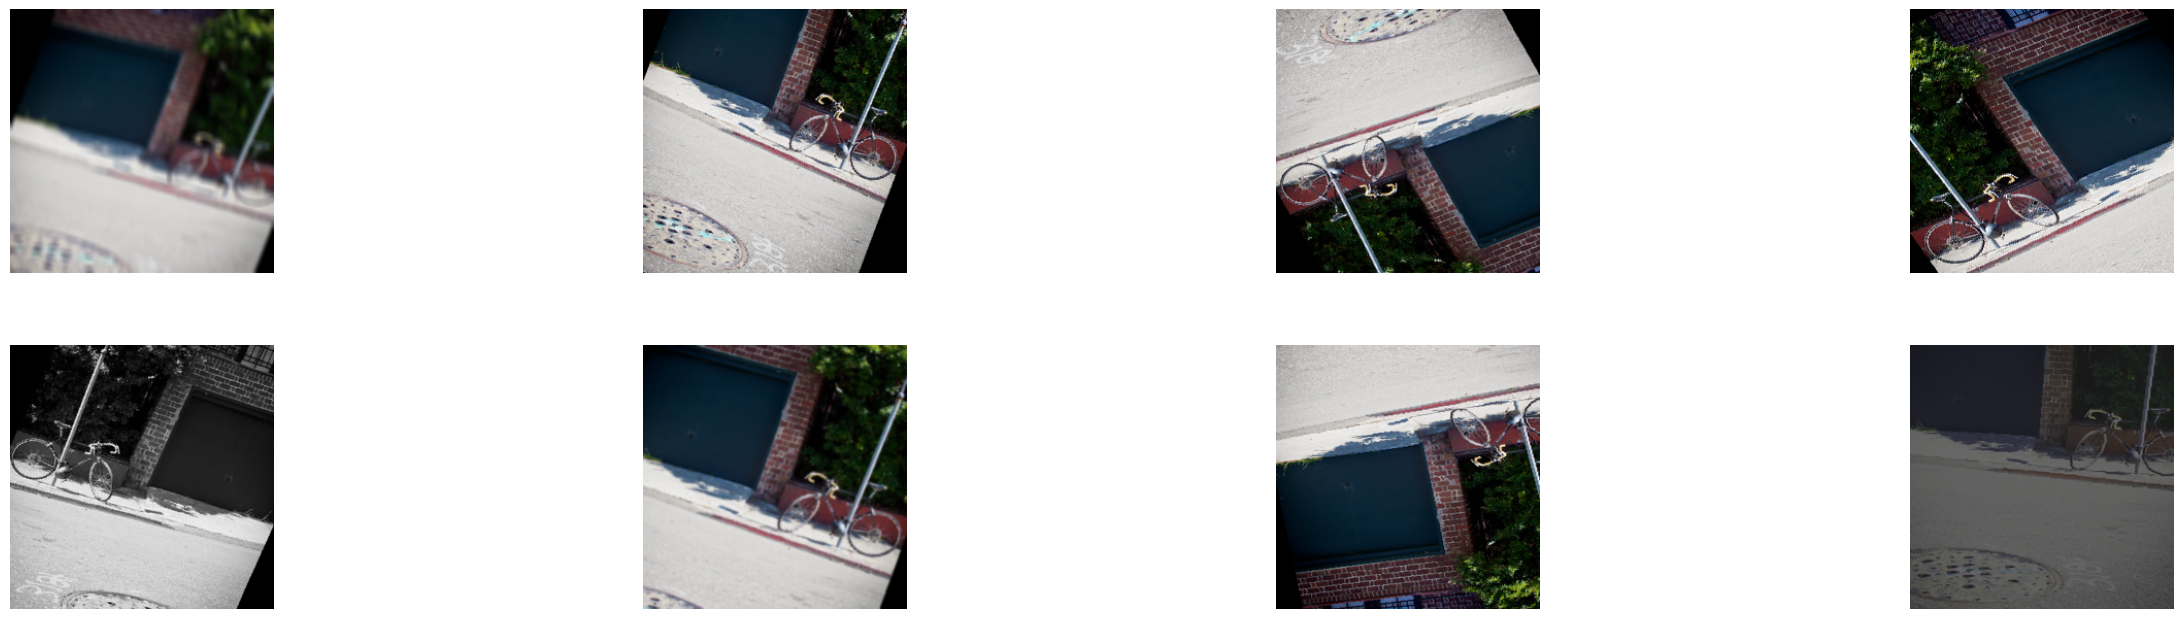

In [81]:
augment_images = [complex_random_augmentation(image) for _ in range(8)]
visualize_images(augment_images)

# LOAD THE MODEL


In [82]:
model, preprocess = clip.load("RN50", device="cuda")

# ENCODE *

In [83]:
text_descriptions = [f"This is a photo of a {label}" for label in wordnet_classes.values()]
text_tokens = clip.tokenize(text_descriptions).cuda()

In [107]:
_augment_images = [preprocess(image) for image in augment_images]
augment_images_input = torch.tensor(np.stack(_augment_images)).cuda()

with torch.no_grad():
    augment_images_features = model.encode_image(augment_images_input).float()
    text_features = model.encode_text(text_tokens).float()
    augment_images_features /= augment_images_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    
text_probs = (100.0 * augment_images_features @ text_features.T).softmax(dim=-1)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
probs, labels_predicted = text_probs.cpu().topk(len(wordnet_classes.values()), dim=-1)
print(labels_predicted)

tensor([[110, 138,  81,  ...,  49,  74, 189],
        [172, 170, 136,  ..., 189,  73, 185],
        [172, 163, 110,  ..., 189,  67, 185],
        ...,
        [172, 170, 110,  ..., 185,  13, 189],
        [ 86, 172, 176,  ...,  73,  27, 189],
        [172, 170, 125,  ...,  62, 185, 189]])


# DISPLAY THE RESULTS

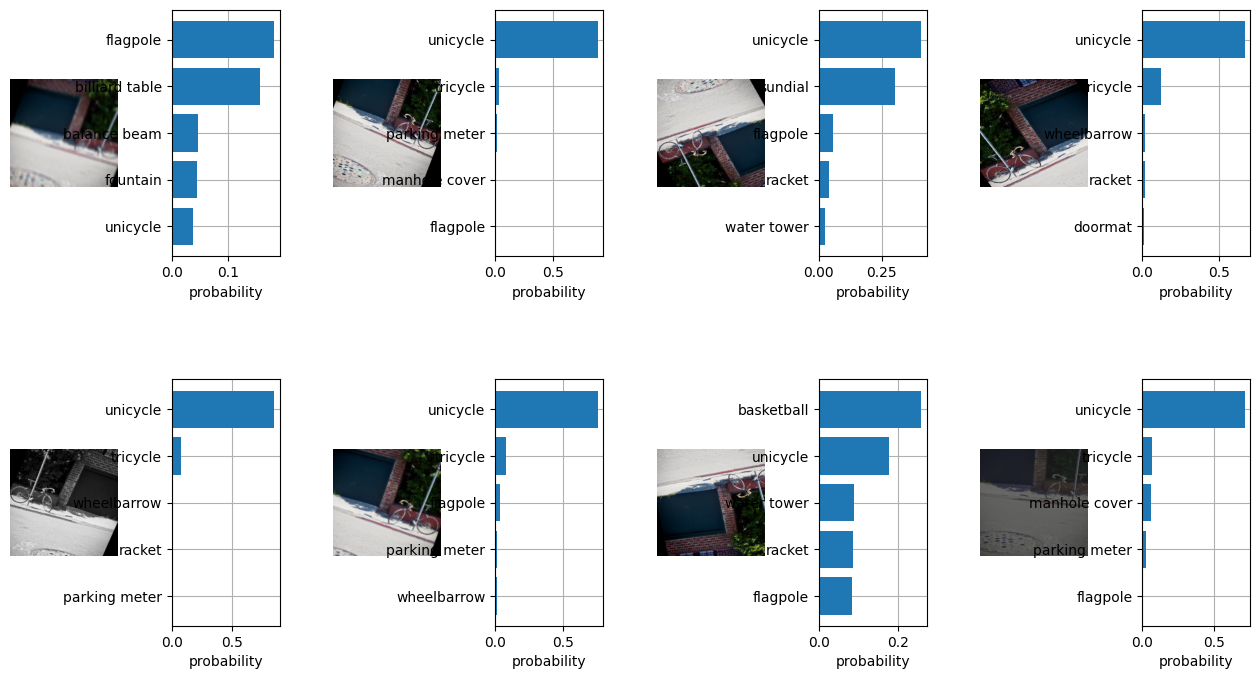

manhole cover


In [103]:
visualize_results(augment_images, top_probs, top_labels)
print(label)

# CONFIDENCE SELECTION

- If a prediction is grater than 0.3 we keep the results
- Otherwise take the mean of all the predictions and if it is less than 0.2 discard it

In [86]:
# Find the entropy of the probabilities [taken from paper tpt]
def calculate_entropy(tensor_top_prob, top=4):
    entropy = - (tensor_top_prob.softmax(-1) * tensor_top_prob.log_softmax(-1)).sum(-1)
    idx = torch.argsort(entropy, descending=False)[:top]
    return tensor_top_prob[idx], idx


selected, indexs = calculate_entropy(top_probs)
print("selected ones: ", selected)
print(indexs)

selected ones:  tensor([[0.8865, 0.0353, 0.0166, 0.0087, 0.0057],
        [0.8531, 0.0791, 0.0075, 0.0060, 0.0060],
        [0.7527, 0.0823, 0.0357, 0.0162, 0.0102],
        [0.7161, 0.0659, 0.0600, 0.0245, 0.0086]])
tensor([1, 4, 5, 7])


# COMPUTE THE AVERAGE OF THE PREDICTION

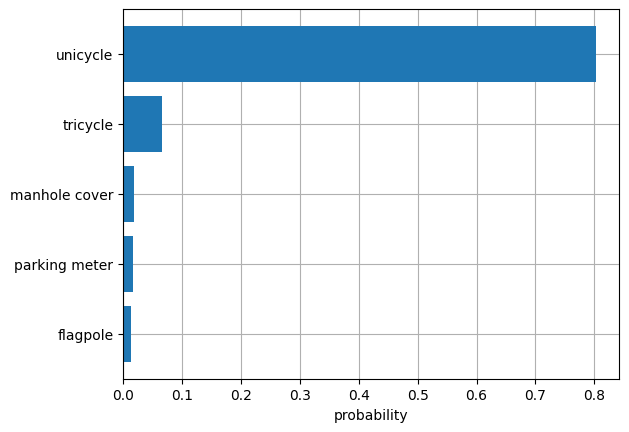

In [115]:
def compute_average_prediction(indexes, probs):
    sum_probs = 0
    for i in indexes:
        sum_probs += probs[i]
    return sum_probs / len(indexes)

# reorder the prob array according to the labels_predicted array
def reorder_probabilities(labels_predicted, distribution_list):
    ordered_dist = torch.zeros_like(distribution_list)
    for i, distribution in enumerate(distribution_list):
        for j in range(len(distribution)):
            ordered_dist[i][labels_predicted[i][j]] = distribution[j]
            
    return ordered_dist

probs_ordered = reorder_probabilities(labels_predicted, probs)

average_prediction = compute_average_prediction(indexs, probs_ordered)
top_probs, top_labels = average_prediction.cpu().topk(5, dim=-1)
bar_graph(top_labels, top_probs)